# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

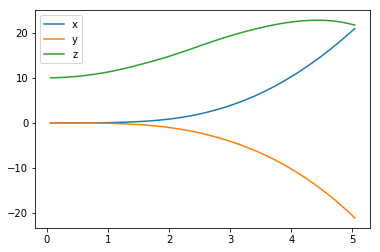

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

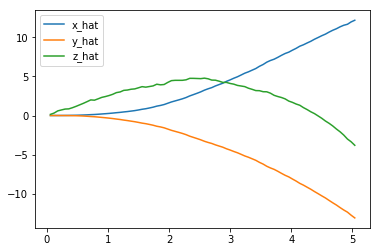

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

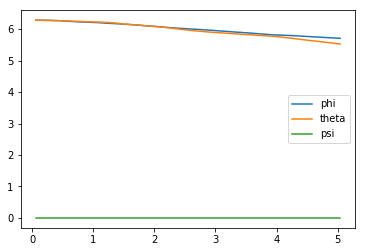

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

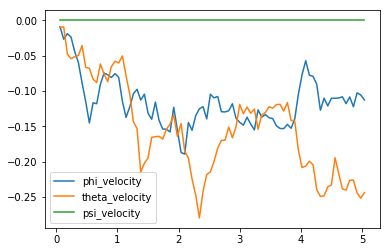

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

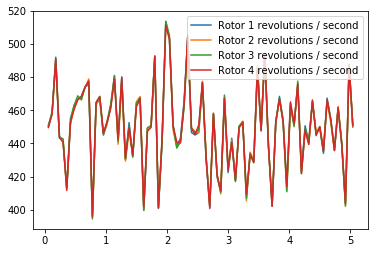

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 20.93217716 -21.0661318   21.6944302    5.70767062   5.52562466   0.        ]
[ 12.19529677 -13.10920449  -3.8125464 ]
[-0.1127422  -0.24399874  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   0.686 (best =   0.979), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Take off task

In [18]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from agents.agent import DDPG_agent
from task import Task

# TAKE OFF TASK

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial position, (x, y, z, and Euler angles)
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 100
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos, init_pose=init_pose, init_velocities = init_velocities,
            init_angle_velocities = init_angle_velocities, task_type='take-off')
agent = DDPG_agent(task) 

rewards = []
scores = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        rewards.append([i_episode, reward, next_state[0], next_state[1], next_state[2]])
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_average = {:4.3f}".format(
                i_episode, agent.score, agent.best_score, agent.noise_average), end="")  # [debug]
            # add rewards to file
            scores.append((i_episode, agent.score, agent.count))
            break
    sys.stdout.flush()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =  100, score = 200999.918 (best = 251998.960), noise_average = 0.000

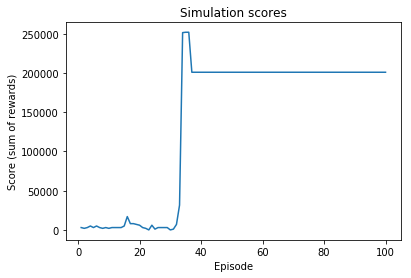

In [19]:
df_scores = pd.DataFrame(data = scores)
df_scores.columns = ['episode', 'score', 'num_steps']
plt.plot(df_scores.episode, df_scores.score)
plt.title("Simulation scores")
plt.ylabel("Score (sum of rewards)")
plt.xlabel("Episode")
plt.show()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [20]:
df_rewards = pd.DataFrame(data = rewards)
df_rewards.columns = ['episode', 'reward', 'pos_x', 'pos_y', 'pos_z']

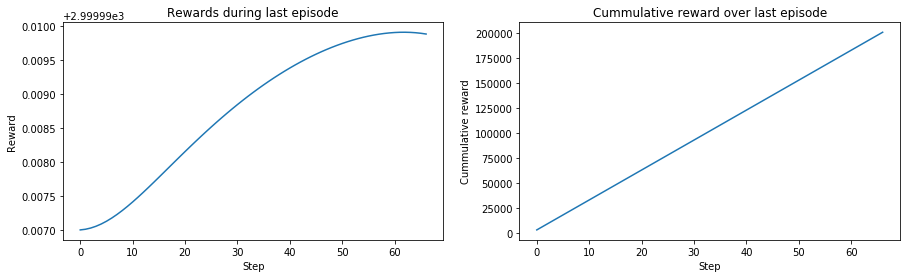

In [21]:
rews = df_rewards[df_rewards.episode == num_episodes].reward.values
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axes
ax1.plot(range(len(rews)), rews)
ax1.set_xlabel("Step")
ax1.set_ylabel("Reward")
ax1.set_title("Rewards during last episode")

ax2.plot(range(len(rews)), np.cumsum(rews))
ax2.set_xlabel("Step")
ax2.set_ylabel("Cummulative reward")
ax2.set_title("Cummulative reward over last episode")
plt.show()

In the charts below it is shown the learning process of the agent by looking at positioning dynamics in several episodes.

Position of quadcopter in sample of episodes


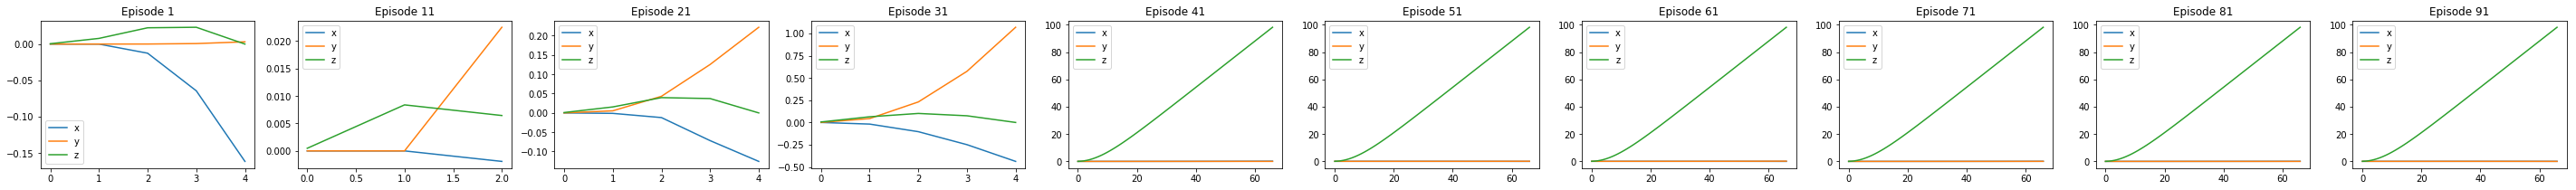

In [22]:
fig, axes = plt.subplots(1, num_episodes//10, figsize=(num_episodes//2, 3))
print("Position of quadcopter in sample of episodes")
for i in range(num_episodes//10):
    i_plot = 111 + i
    e = i * 10 + 1
    ax = axes[i]
    ax.plot(range(df_rewards[df_rewards.episode == e].pos_x.count()), df_rewards[df_rewards.episode == e].pos_x.values, label='x')
    ax.plot(range(df_rewards[df_rewards.episode == e].pos_x.count()), df_rewards[df_rewards.episode == e].pos_y.values, label='y')
    ax.plot(range(df_rewards[df_rewards.episode == e].pos_x.count()), df_rewards[df_rewards.episode == e].pos_z.values, label='z')
    ax.legend()
    ax.set_title("Episode " + str(e))

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task that I have implemented if for take-off. Because of this, I let the episode finish earlier if the distance to the target is close enough.
The reward function provides a reward for continuing in the episode (i.e. not finishing because of off positions) and a penalization based on the distance to target.

These 2 components are computed as specified below:

* The extra reward for continuing in the episode is computed as $targetpos_z * 10$. I realized that the extra reward had to be proportional to the vertical position that wants to be reached in order to make the agent learn to reach the target regardless of how far the target vertical position is.
* The penalization based on the distance is computed as 
$$0.0001 * (-1 * mov_x**2  - 1 * mov_y**2 + 10 * np.sign(mov_z) * mov_z**2)$$
where $mov_x$ is the relative distance in component x to the target (max distance equals 1). Note that the verical component penalization has 10 times the weight of the other components.

After this reward is evaluated, which value is always positive, it is checked if the quadcopter vertical position is higher that the vertical position in the previous time step. In this is is the case, the reward is kept as it is, nevertheless if the vertical position is lower than the previous vertical position, the reward is multiplied by -1.


Before arriving to the reward formula explained above, I tried many different values. I started from the given one 
$$reward = 1.-.2*(abs(self.sim.pose[:3] - self.targetpos)).sum()$$
but this ended in the quadcopter learning to exit the episode in just one step. It took me many trials until that didn't happen. I realized that in order to fix that behaviour I needed to give a substancial reward for staying in the episode. Also this reward had to be proportional to the distance to the target not to make this reward disapear due to the penalization based on the distance to target.

Once I managed to make the quadcopter keep flying I introduced the penalization to the distance and I thought of giving it a head start towards taking off by penalizing more the vertical component and that seemed to work just fine! I also thought that the distance should be measured as relative (max distance equals 1) not to make it too difficult for the quadcopter if the target is far away. After all, I want the quadcopter to be able to go to height 10, 50 100 or even 1000 if I tell it to do it. A tricky parameter to set was the factor $0.0001$ that softens the penalization based on the distance to target. I tried different values to make this work. Higher values penalize too much, making the quadcopter behave as in the first trials, learning to exit episode in one step.

At some moment my quadcopter could take off but I realised that my target position was [0, 0, 10] and it was reaching [0, 0, 120]. Because of that, I thought that I should add a clause for early finalization of the episode in case the bot reaches the target position ealier, which made the trick. I also tried adding an extra reward of 5000 times the number of steps not used in episode is added if target position is reached before the episode ends but this didn't seem to make the bot learn faster with the current formula so I decided to remove this added complexity since the agent was already doing fine.

The very last change I made was to make the reward negative if the updated position was further away from the target than the previous position. This last change I made in order to have very different reward values when the quadcopter is taking actions that do not lead to the target position.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
The algorithm implemented is based on the recommended DDPG algorithm.
For the Actor I used 3 hidden dense layers with relu activation with 32, 64 and 32 units. The output layer has as many units as the possible number of actions and sigmoid activation funtion. The output is then scaled to the needed action range. I used Adam optimizer for this network. I tried making this network more complex by adding an additional hidden layer of 128 units as well as adding dropout but this did not improve the results so I kept the more simple architecture.

For the Critic I used 2 hidden layers of 32 and 64 units and relu activation for both paths, the actions and the states. Then both paths are put together using a relu activation function in order to obtain the Q-values. As for the actor, I tried more complex network without getting better performance. I also used Adam as optimizer.

For the hyperparameters:
- I chose $\gamma$ to be 0.99 which is really close to 1, so it just gives a soft preference to the rewards earned now with respect to the rewards earned in the future.
- The big change in results that I obtained was when modifying the $\tau$ paramater for the soft update. I initially was using 0.01 which have very bad results. Changing it to 0.1 made a difference. The $\tau$ parameter makes the update of the weghts slower, the higher the value of $\tau$. Updating the weights slower worked better.
- I reduced the exploration factor $\sigma$ from 0.2 to 0.001. I think the quadcopter was exploring too much, making it difficult to reach the target and after all, it needs many steps to reach the goal.
- The $\mu$ exploration parameter I kept as $0$ because I wanted to have non-biased noise.
- The $\theta$ exploration parameter I kept as $0.15$ since it seemed to work just fine.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

At the beginning it learns very slow, but it is only after 20 to 40 episodes (depending on the simulation) that it has that aha moment and then the performance is constant.
The final performance was really good, it reaches the target position before the episode runs out of time (in 67 steps, when total number of steps per episode is 84). The speed to reach the position is constant and looks overall very stable.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- Getting started was very hard. It took me a while to go through all the classes for the agent and understand the relationships. In addition at the beginning I could not get the agent to learn and I tried many architectures until I finally realised the reward function was the key place to look at. After that I had lot's of fun adjusting and trying small modifications.

- I found very interesing how big the impact of the task definition and reward is important and also how much effort it takes. For example in order to make the agent to fly over, the reward definition must be very different since the episode must run for as long as possible and changes in positions must be penalized higher.

Overall it was a very complex but fun project!